In [104]:
#Install Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_profiling as pp
import plotly.express as px
import seaborn as sns
import os
import tensorflow as tf
import sklearn
import warnings  
warnings.filterwarnings('ignore')

from matplotlib import style
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers




from sklearn import preprocessing
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score,confusion_matrix, roc_curve, recall_score, precision_score, classification_report 



# WINGER

In [105]:
winger = pd.read_excel("C:/Users/Stanley/OneDrive - Teesside University/Documents/IMPORTANT DOCUMENTS/FINAL PROJECT/Winger.xlsx")
winger.head(3)

,Date,Game Type,No of Sprints,Accelerations,Distance(km),Sprint Distance(m),No of HIR,H.intensity Running(m),Time Played,Decelerations,Metres Per Minute,Top Speed,Player position,Key,DISTpMIN,HIRpMIN
0,2022-09-14 00:00:00,Training,1,47,2.85,34,3,65,45,25,67,24.65kph,Winger,0,1.444444,0.066667
1,2022-09-18 00:00:00,Match Day,4,58,7.57,67,7,269,70,34,83,25.74kph,Winger,1,3.842857,0.100000
2,2022-09-21 00:00:00,Training,0,14,4.23,0,1,54,50,15,38,25.84kph,Winger,0,1.080000,0.020000


In [106]:
winger.shape

(50, 16)

In [107]:
winger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    50 non-null     object 
 1   Game Type               50 non-null     object 
 2   No of Sprints           50 non-null     int64  
 3   Accelerations           50 non-null     int64  
 4   Distance(km)            50 non-null     float64
 5   Sprint Distance(m)      50 non-null     int64  
 6   No of HIR               50 non-null     int64  
 7   H.intensity Running(m)  50 non-null     int64  
 8   Time Played             50 non-null     int64  
 9   Decelerations           50 non-null     int64  
 10  Metres Per Minute       50 non-null     int64  
 11  Top Speed               50 non-null     object 
 12  Player position         50 non-null     object 
 13  Key                     50 non-null     int64  
 14  DISTpMIN                50 non-null     floa

In [108]:
# Convert each value of the column to a string
winger['Top Speed'] = winger['Top Speed'].str.replace('kph'," ")
winger['Top Speed'] = pd.to_numeric(winger['Top Speed'])

In [109]:
winger = winger[['No of Sprints','Accelerations','Player position','Sprint Distance(m)','H.intensity Running(m)','Time Played','Decelerations','Metres Per Minute','Top Speed','Distance(km)','Key','No of HIR', 'HIRpMIN', 'DISTpMIN']].copy()

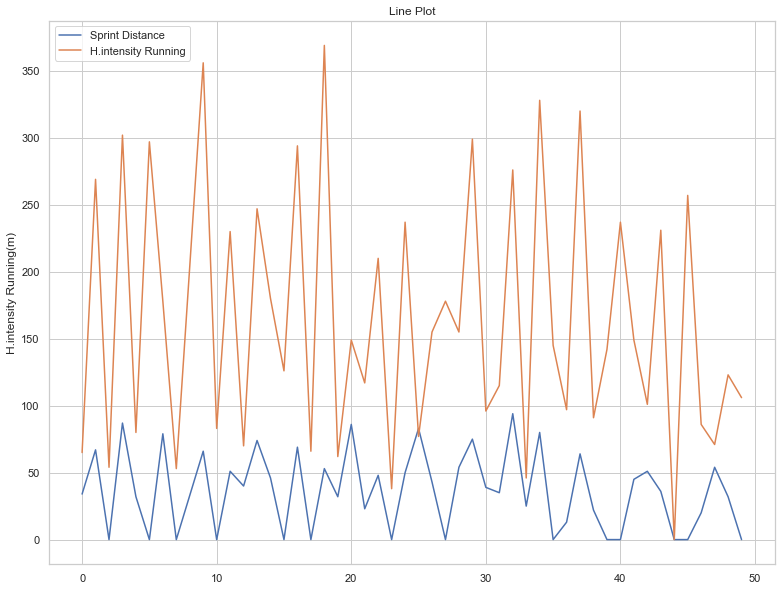

In [110]:
# Line plot 
plt.figure(figsize=(13,10))

plt.plot(winger['Sprint Distance(m)'], label = 'Sprint Distance')
plt.plot(winger['H.intensity Running(m)'], label = 'H.intensity Running')

# Adding Title to the Plot
plt.title("Line Plot")
 
# Setting the X and Y labels
plt.ylabel('H.intensity Running(m)')
plt.legend(loc="upper left") 


plt.show()

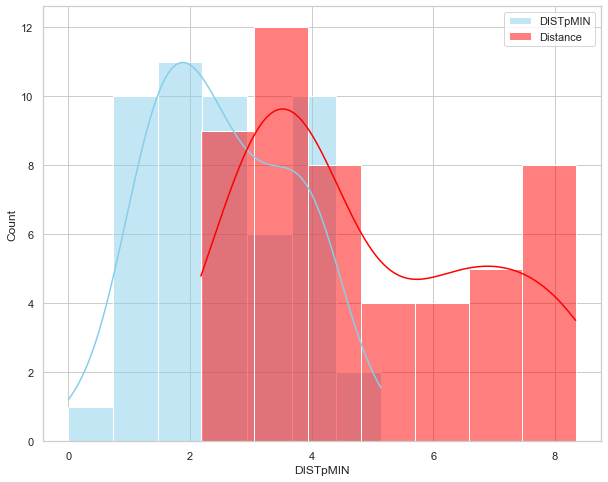

In [111]:
sns.histplot(data=winger, x="DISTpMIN", color="skyblue", label="DISTpMIN", kde=True)
sns.histplot(data=winger, x="Distance(km)", color="red", label="Distance", kde=True)

plt.legend() 
plt.show()

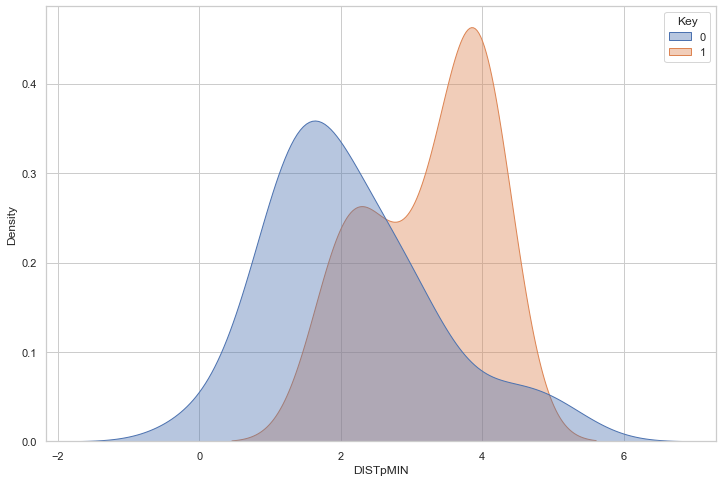

In [112]:
#Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

#set seaborn whitegrid theme
sns.set(style="whitegrid")

#With transparency
sns.kdeplot(data=winger, x="DISTpMIN", hue="Key", fill=True, common_norm=False, alpha=0.4)
plt.show()

**where 0 = Training, 1 = Match**

In [113]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'player position' column
winger['Player position'] = lab.fit_transform(winger['Player position'])

#view updated DataFrame
print(winger)

    No of Sprints  Accelerations  Player position  Sprint Distance(m)  \
0               1             47                0                  34   
1               4             58                0                  67   
2               0             14                0                   0   
3               1             15                0                  87   
4               2             25                0                  32   
5               0             36                0                   0   
6               3             28                0                  79   
7               0             39                0                   0   
8               2             19                0                  33   
9               4             17                0                  66   
10              0             23                0                   0   
11              1             43                0                  51   
12              1             24                0  

In [114]:
x= winger.drop(['Key'], axis=1)
y=winger['Key']

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [116]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [117]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.472657,0.142612,0.0,-0.135512,-0.301300,-0.370594,-0.910775,0.129202,-0.445268,0.342676,-0.417470,-0.325314,-0.099301
1,-1.102865,0.069209,0.0,-1.147338,-0.107524,-0.676509,0.078253,0.203335,-0.976829,-0.599798,0.272834,0.799297,0.396186
2,-1.102865,-1.252048,0.0,-1.147338,-1.005012,-0.676509,-1.062933,-2.094775,0.062130,-0.352062,-0.877672,-0.943058,-1.048487
3,0.472657,2.051094,0.0,0.560118,-0.831634,-0.676509,0.762964,0.425733,-0.614401,-1.079114,-0.877672,-0.943058,-0.769402
4,0.472657,0.729837,0.0,0.307161,0.280028,1.770811,-0.530380,1.908384,-0.058679,0.590412,-0.072318,-0.342914,-0.293317
5,2.048179,-0.591420,0.0,1.824900,1.259106,1.770811,0.991201,1.760119,0.698392,1.812936,1.998595,1.399442,0.582243
6,-0.315104,-0.297807,0.0,-0.009034,0.800163,-0.676509,-0.986854,1.018793,-2.201029,-0.470545,-0.302419,-0.071880,1.857276
7,-1.102865,-0.444614,0.0,-1.147338,-0.076928,-0.676509,-0.454301,-0.019063,0.070184,-0.632112,0.387885,0.973533,0.445437
8,0.472657,0.656434,0.0,0.465259,-0.525672,-0.676509,-0.302143,0.722263,-0.276135,-0.944475,-0.762622,-0.768823,-0.276900
9,0.472657,-1.178645,0.0,0.085824,-0.576665,-0.982424,-0.149984,-0.537991,-0.525808,0.897389,-0.647571,-0.536509,-0.183872


In [118]:
#RANDOM FOREST

rf = RandomForestRegressor()
rfmodel = rf.fit(x_train, y_train)
rfscore = rf.score(x_test, y_test)*100
rf_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, rf.predict(x_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Accuracy of DT model is: %.2f"%rfscore)

The mean squared error (MSE) on test set: 0.0051
Accuracy of DT model is: 97.89


In [119]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter search space
param_grid = {
    'n_estimators': [5, 20, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define evaluation metric
scoring = 'neg_mean_squared_error'

# Define RF model
model = RandomForestRegressor(random_state=30)

# Define GridSearchCV object
grid_search = GridSearchCV(
    model, param_grid, scoring=scoring, cv=5, n_jobs=-1)

# Fit GridSearchCV object
grid_search.fit(x_train, y_train)

# Print best hyperparameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use best hyperparameters to fit final model
best_model = grid_search.best_estimator_
best_model.fit(x, y)

# Evaluate final model on test data
y_pred = best_model.predict(x)
test_score = mean_squared_error(y, y_pred)
print("Final model test score:", test_score)


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}
Best score: -0.02285714285714286
Final model test score: 0.012800000000000002


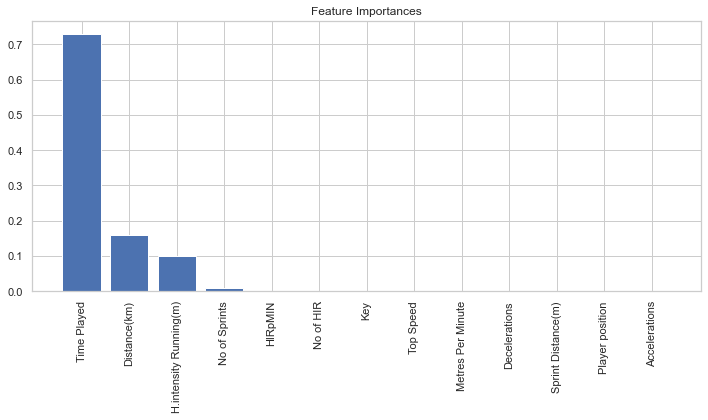

In [120]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# create a random forest regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model on the training data
rf.fit(x_train, y_train)

# get feature importances
importances = rf.feature_importances_

# get feature names
feature_names = np.array(['No of Sprints','Accelerations','Player position','Sprint Distance(m)','H.intensity Running(m)','Time Played','Decelerations','Metres Per Minute','Top Speed','Distance(km)','Key','No of HIR', 'HIRpMIN', 'DISTpMIN'])

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [121]:
#DECISION TREE

dt = DecisionTreeRegressor()
dtmodel = dt.fit(x_train, y_train)
dtscore = dt.score(x_test, y_test)*100
dt_pred = dt.predict(x_test)
mse = mean_squared_error(y_test, dt.predict(x_test))


print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Accuracy of DT model is: %.3f"%dtscore)

[[9 0]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

The mean squared error (MSE) on test set: 0.0000
Accuracy of DT model is: 100.000


In [122]:
#RIDGE REGRESSION MODEL

ridgeReg = Ridge(alpha=10)

ridgeReg.fit(x_train,y_train)
ridgescore = ridgeReg.score(x_test, y_test)*100
ridgeReg = ridgeReg.predict(x_test)

print("Accuracy of LG model is: %.3f"%ridgescore)

Accuracy of LG model is: 85.126


In [123]:
#SUPPORT VECTOR REGRESSION

svr = SVR()
svr = svr.fit(x_train, y_train)
svrscore = svr.score(x_test, y_test)*100
y_pred = svr.predict(x_test)
mse = mean_squared_error(y_test, svr.predict(x_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Accuracy of LG model is: %.2f"%svrscore)

The mean squared error (MSE) on test set: 0.0438
Accuracy of LG model is: 81.76


In [124]:
# Initialize Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
las = lasso.fit(x_train, y_train)

las_score = las.score(x_test, y_test)*100
# Make predictions on the testing data
y_pred = lasso.predict(x_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("Accuracy of Lasso model is: %.2f"%las_score)

Mean Squared Error:  0.030553378491981795
Accuracy of Lasso model is: 87.27


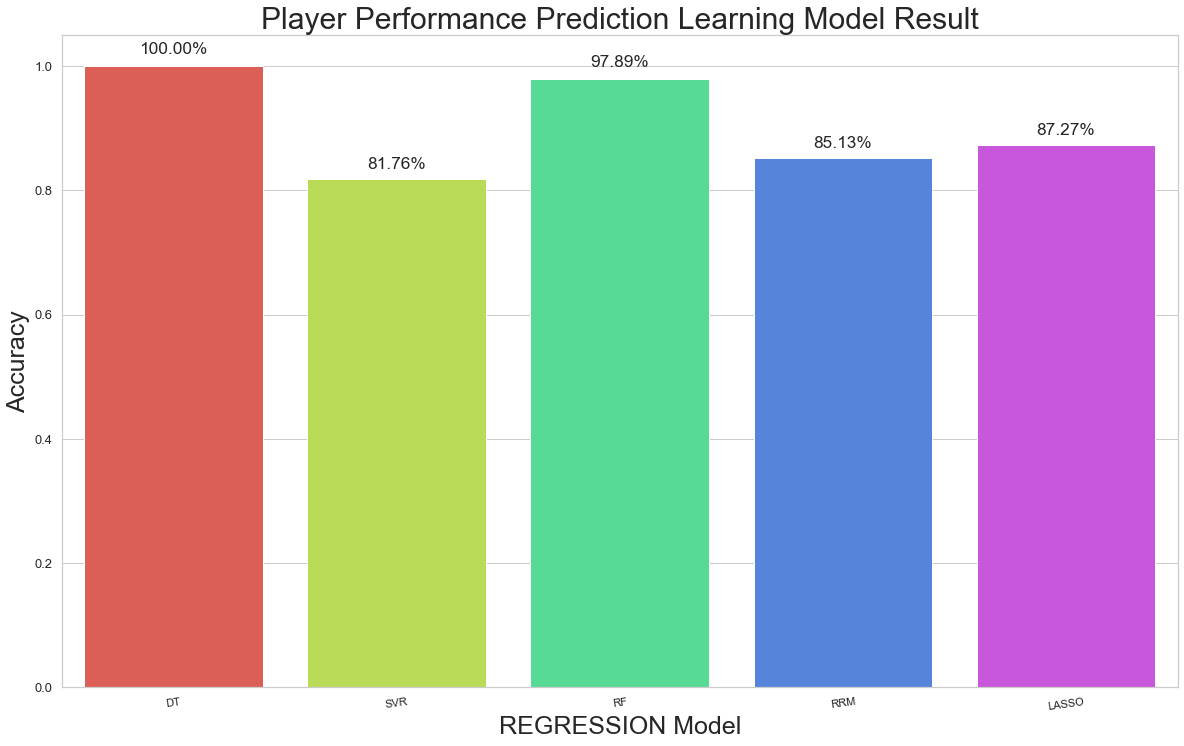

In [125]:
viz =[]
viz2 = []
viz.append(dtscore/100)
viz2.append('DT')
viz.append(svrscore/100)
viz2.append('SVR')
viz.append(rfscore/100)
viz2.append('RF')
viz.append(ridgescore/100)
viz2.append('RRM')
viz.append(svrscore/100)
viz2.append('SVR')
viz.append(las_score/100)
viz2.append('LASSO')
plt.rcParams['figure.figsize'] = 10,8
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
ax = sns.barplot(x=viz2, y=viz, palette= 'hls', saturation=1.5)
plt.xlabel('REGRESSION Model', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
plt.title('Player Performance Prediction Learning Model Result',fontsize=30 )
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

# MIDFIELDER

In [126]:
mid = pd.read_excel("C:/Users/Stanley/OneDrive - Teesside University/Documents/IMPORTANT DOCUMENTS/FINAL PROJECT/Midfielder.xlsx")
mid.head(3)

,Date,Game Type,No of Sprints,Accelerations,Distance(km),Sprint Distance(m),No of HIR,H.intensity Running(m),Time Played,Decelerations,Metres Per Minute,Top Speed,Player position,Key,DISTpMIN,HIRpMIN
0,2022-09-14,Training,2,16,1.84,53,2,49,60,11,65,27.1 kph,Midfielder,0,0.816667,0.033333
1,2022-09-18,Match Day,2,38,3.92,51,4,121,40,41,43,27.8 kph,Midfielder,1,3.025000,0.100000
2,2022-09-21,Training,0,35,5.03,7,8,147,50,37,75,24.1 kph,Midfielder,0,2.940000,0.160000


In [127]:
mid.shape

(51, 16)

In [128]:
mid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    51 non-null     datetime64[ns]
 1   Game Type               51 non-null     object        
 2   No of Sprints           51 non-null     int64         
 3   Accelerations           51 non-null     int64         
 4   Distance(km)            51 non-null     float64       
 5   Sprint Distance(m)      51 non-null     int64         
 6   No of HIR               51 non-null     int64         
 7   H.intensity Running(m)  51 non-null     int64         
 8   Time Played             51 non-null     int64         
 9   Decelerations           51 non-null     int64         
 10  Metres Per Minute       51 non-null     int64         
 11  Top Speed               51 non-null     object        
 12  Player position         51 non-null     object      

In [129]:
# Convert each value of the column to a string
mid['Top Speed'] = mid['Top Speed'].str.replace('kph'," ")
mid['Top Speed'] = pd.to_numeric(mid['Top Speed'])

In [130]:
mid = mid[['No of Sprints','Accelerations','Player position','Sprint Distance(m)','H.intensity Running(m)','Time Played','Decelerations','Metres Per Minute','Top Speed','Distance(km)','Key','No of HIR', 'HIRpMIN', 'DISTpMIN']].copy()

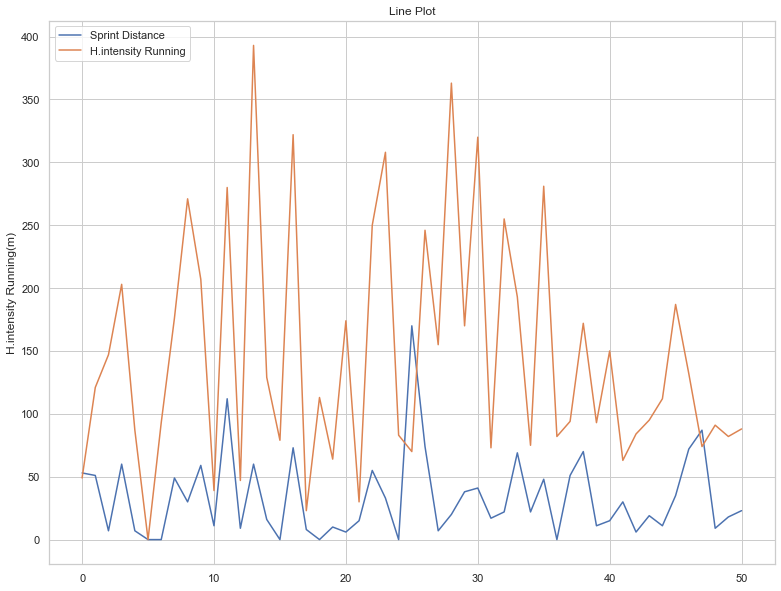

In [131]:
# Line plot 
plt.figure(figsize=(13,10))

plt.plot(mid['Sprint Distance(m)'], label = 'Sprint Distance')
plt.plot(mid['H.intensity Running(m)'], label = 'H.intensity Running')

# Adding Title to the Plot
plt.title("Line Plot")
 
# Setting the X and Y labels
plt.ylabel('H.intensity Running(m)')
plt.legend(loc="upper left") 


plt.show()

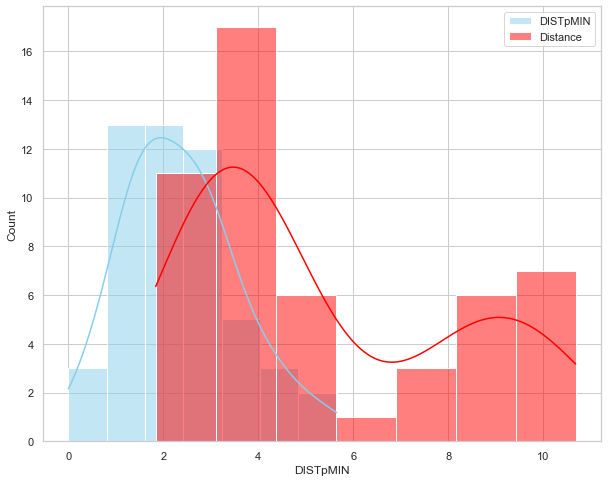

In [132]:
sns.histplot(data=mid, x="DISTpMIN", color="skyblue", label="DISTpMIN", kde=True)
sns.histplot(data=mid, x="Distance(km)", color="red", label="Distance", kde=True)

plt.legend() 
plt.show()

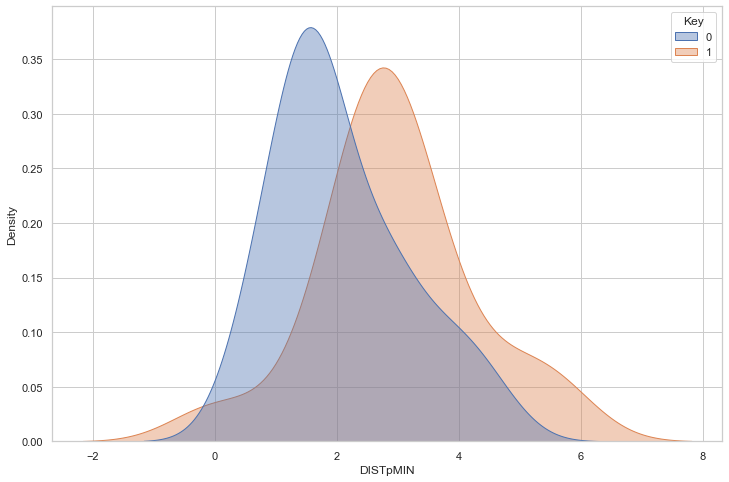

In [133]:
#Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

#set seaborn whitegrid theme
sns.set(style="whitegrid")

#With transparency
sns.kdeplot(data=mid, x="DISTpMIN", hue="Key", fill=True, common_norm=False, alpha=0.4)
plt.show()

**where 0 = Training, 1 = Match**

In [134]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'player position' column
mid['Player position'] = lab.fit_transform(mid['Player position'])

#view updated DataFrame
print(winger)

    No of Sprints  Accelerations  Player position  Sprint Distance(m)  \
0               1             47                0                  34   
1               4             58                0                  67   
2               0             14                0                   0   
3               1             15                0                  87   
4               2             25                0                  32   
5               0             36                0                   0   
6               3             28                0                  79   
7               0             39                0                   0   
8               2             19                0                  33   
9               4             17                0                  66   
10              0             23                0                   0   
11              1             43                0                  51   
12              1             24                0  

In [135]:
X= mid.drop(['Key'], axis=1)
y=mid['Key']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [137]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.561041,-1.563991,0.0,-0.629636,-1.181768,-0.330005,-1.649491,-1.118309,0.521006,-0.635480,-1.127362,-1.187054,-1.376335
1,-1.288316,0.524171,0.0,-1.167130,-0.486518,0.145311,0.219073,1.405012,-1.611862,0.994022,-0.814206,-0.921443,-0.627444
2,0.893510,1.120789,0.0,-0.092142,1.477841,1.333599,2.409803,1.111603,1.481611,1.876517,1.847620,0.891104,0.709373
3,-1.288316,0.076708,0.0,-0.952132,0.407376,0.145311,0.734539,0.759511,-1.253671,0.334898,0.125262,0.052463,0.426682
4,-1.288316,-1.191105,0.0,-1.167130,-0.607910,-0.567662,-1.069592,-1.763810,-0.170955,-0.712378,-0.814206,-0.726662,-0.450455
5,0.166234,0.971635,0.0,0.015357,1.886162,2.759545,0.605672,-0.531490,-0.122111,1.191760,2.317354,0.539416,0.333416
6,-1.288316,-1.713145,0.0,-1.167130,-1.512840,-0.425068,-1.069592,0.759511,-1.937491,-1.133485,-0.814206,-0.774439,-1.837737
7,0.166234,1.344521,0.0,-0.450471,2.493127,1.333599,0.927839,-0.355445,-0.227940,1.301614,2.317354,1.242793,1.574074
8,-0.561041,-0.221601,0.0,0.194522,0.363233,-0.805320,-1.262891,-0.238081,0.195377,0.060263,-0.970784,-0.867337,1.357899
9,-1.288316,0.598748,0.0,-0.916300,-0.552732,-0.567662,0.219073,0.172692,-0.390755,-0.518302,-0.814206,-0.726662,-0.365865


In [139]:
#RANDOM FOREST

rf = RandomForestRegressor()
rfmodel = rf.fit(X_train, y_train)
rfscore = rf.score(X_test, y_test)*100
rf_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, rf.predict(X_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Accuracy of RF model is: %.2f"%rfscore)

The mean squared error (MSE) on test set: 0.0856
Accuracy of RF model is: 63.49


In [140]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter search space
param_grid = {
    'n_estimators': [5, 20, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define evaluation metric
scoring = 'neg_mean_squared_error'

# Define RF model
model = RandomForestRegressor(random_state=30)

# Define GridSearchCV object
grid_search = GridSearchCV(
    model, param_grid, scoring=scoring, cv=5, n_jobs=-1)

# Fit GridSearchCV object
grid_search.fit(X_train, y_train)

# Print best hyperparameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use best hyperparameters to fit final model
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# Evaluate final model on test data
y_pred = best_model.predict(X)
test_score = mean_squared_error(y, y_pred)
print("Final model test score:", test_score)


Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: -0.1883542857142857
Final model test score: 0.012132843137254901


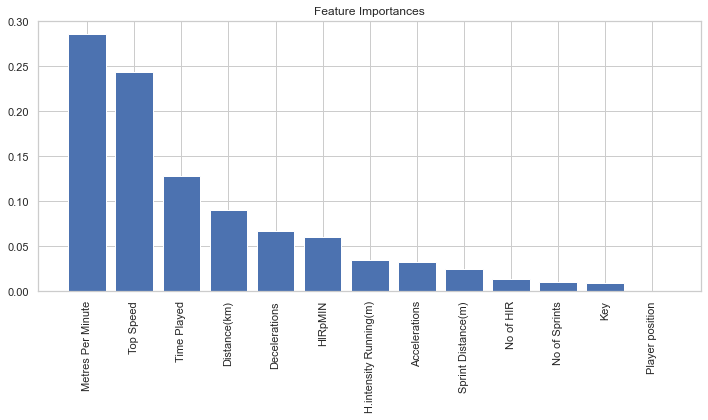

In [141]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# create a random forest regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model on the training data
rf.fit(X_train, y_train)

# get feature importances
importances = rf.feature_importances_

# get feature names
feature_names = np.array(['No of Sprints','Accelerations','Player position','Sprint Distance(m)','H.intensity Running(m)','Time Played','Decelerations','Metres Per Minute','Top Speed','Distance(km)','Key','No of HIR', 'HIRpMIN', 'DISTpMIN'])

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


In [142]:
#DECISION TREE

dt = DecisionTreeRegressor()
dtmodel = dt.fit(X_train, y_train)
dtscore = dt.score(X_test, y_test)*100
dt_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, dt.predict(X_test))


print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Accuracy of DT model is: %.2f"%dtscore)

[[9 1]
 [1 5]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.83      0.83      0.83         6

    accuracy                           0.88        16
   macro avg       0.87      0.87      0.87        16
weighted avg       0.88      0.88      0.88        16

The mean squared error (MSE) on test set: 0.1250
Accuracy of DT model is: 46.67


In [143]:
#RIDGE REGRESSION MODEL

ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)
ridgescore = ridgeReg.score(X_test, y_test)*100
ridgeReg = ridgeReg.predict(X_test)

print("Accuracy of LG model is: %.3f"%ridgescore)

Accuracy of LG model is: 45.404


In [144]:
#SUPPORT VECTOR REGRESSION

svr = SVR()
svr = svr.fit(X_train, y_train)
svrscore = svr.score(X_test, y_test)*100
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, svr.predict(X_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Accuracy of LG model is: %.2f"%svrscore)

The mean squared error (MSE) on test set: 0.1076
Accuracy of LG model is: 54.08


In [145]:
# Initialize Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
las = lasso.fit(X_train, y_train)

las_score = las.score(X_test, y_test)*100
# Make predictions on the testing data
y_pred = lasso.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("Accuracy of Lasso model is: %.2f"%las_score)

Mean Squared Error:  0.1894134459440303
Accuracy of Lasso model is: 19.18


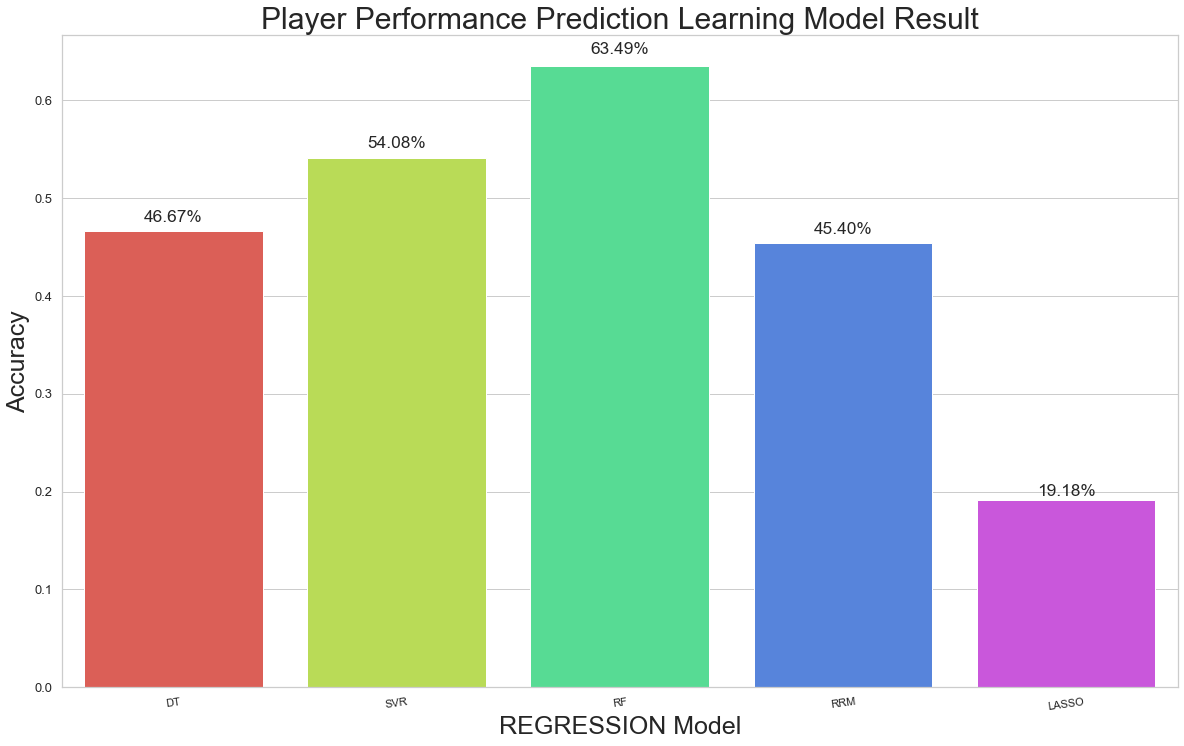

In [146]:
viz =[]
viz2 = []
viz.append(dtscore/100)
viz2.append('DT')
viz.append(svrscore/100)
viz2.append('SVR')
viz.append(rfscore/100)
viz2.append('RF')
viz.append(ridgescore/100)
viz2.append('RRM')
viz.append(las_score/100)
viz2.append('LASSO')
plt.rcParams['figure.figsize'] = 10,8
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
ax = sns.barplot(x=viz2, y=viz, palette= 'hls', saturation=1.5)
plt.xlabel('REGRESSION Model', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
plt.title('Player Performance Prediction Learning Model Result',fontsize=30 )
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

# COMBINED PLAYER PREDICTION

In [44]:
footy = pd.read_excel("C:/Users/Stanley/OneDrive - Teesside University/Documents/IMPORTANT DOCUMENTS/FINAL PROJECT/Main Dataset.xlsx")
footy.head(3)

,Date,Game Type,No of Sprints,Accelerations,Distance (km),Sprint Distance (m),No of HIR,H.intensity Running (m),Time Played,Decelerations,Metres Per Minute,Top Speed,Player position,Key,DISTpMIN,HIRpMIN
0,2022-09-14 00:00:00,Training,1,47,2.85,34,3,65,45,25,67,24.65kph,Winger,0,1.444444,0.066667
1,2022-09-18 00:00:00,Match Day,4,58,7.57,67,7,269,70,34,83,25.74kph,Winger,1,3.842857,0.100000
2,2022-09-21 00:00:00,Training,0,14,4.23,0,1,54,50,15,38,25.84kph,Winger,0,1.080000,0.020000


In [45]:
footy.shape

(101, 16)

In [46]:
footy.isna().any()

Date                       False
Game Type                  False
No of Sprints              False
Accelerations              False
Distance (km)              False
Sprint Distance (m)        False
No of HIR                  False
H.intensity Running (m)    False
Time Played                False
Decelerations              False
Metres Per Minute          False
Top Speed                  False
Player position            False
Key                        False
DISTpMIN                   False
HIRpMIN                    False
dtype: bool

In [47]:
footy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     101 non-null    object 
 1   Game Type                101 non-null    object 
 2   No of Sprints            101 non-null    int64  
 3   Accelerations            101 non-null    int64  
 4   Distance (km)            101 non-null    float64
 5   Sprint Distance (m)      101 non-null    int64  
 6   No of HIR                101 non-null    int64  
 7   H.intensity Running (m)  101 non-null    int64  
 8   Time Played              101 non-null    int64  
 9   Decelerations            101 non-null    int64  
 10  Metres Per Minute        101 non-null    int64  
 11  Top Speed                101 non-null    object 
 12  Player position          101 non-null    object 
 13  Key                      101 non-null    int64  
 14  DISTpMIN                 1

In [48]:
footy.describe()

,No of Sprints,Accelerations,Distance (km),Sprint Distance (m),No of HIR,H.intensity Running (m),Time Played,Decelerations,Metres Per Minute,Key,DISTpMIN,HIRpMIN
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,1.504950,34.386139,5.103861,35.089109,9.732673,155.495050,61.188119,36.019802,66.376238,0.356436,2.463898,0.154040
std,1.293242,13.566850,2.375681,31.367212,7.622193,95.574225,18.640125,16.436533,15.349170,0.481335,1.194263,0.106603
min,0.000000,10.000000,1.840000,0.000000,0.000000,0.000000,20.000000,10.000000,31.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,3.210000,8.000000,4.000000,82.000000,50.000000,24.000000,56.000000,0.000000,1.540000,0.077778
50%,1.000000,35.000000,4.070000,32.000000,7.000000,129.000000,53.000000,34.000000,66.000000,0.000000,2.300000,0.127273
75%,2.000000,46.000000,6.910000,54.000000,14.000000,231.000000,80.000000,49.000000,78.000000,1.000000,3.293333,0.220000
max,5.000000,62.000000,10.680000,170.000000,28.000000,393.000000,120.000000,85.000000,93.000000,1.000000,5.650000,0.460000


<AxesSubplot:>

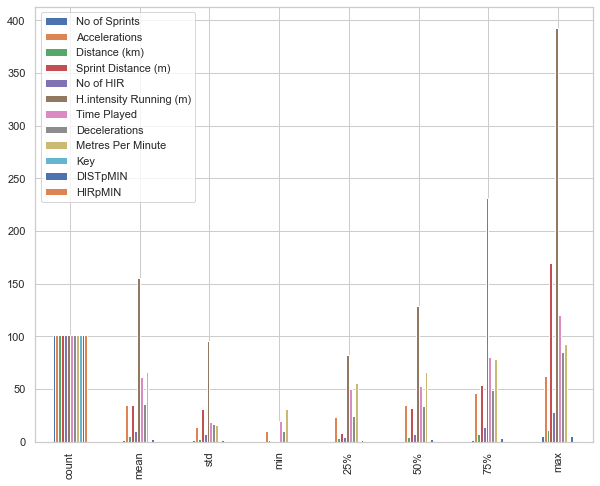

In [49]:
Df = footy.describe()
Df[Df.columns].plot(kind = 'bar')

In [50]:
# Convert each value of the column to a string
footy['Top Speed'] = footy['Top Speed'].str.replace('kph'," ")
footy['Top Speed'] = pd.to_numeric(footy['Top Speed'])

In [51]:
Footy = footy[['No of Sprints','Accelerations','Player position','Sprint Distance (m)','H.intensity Running (m)','Time Played','Decelerations','Metres Per Minute','Top Speed','Distance (km)','Key','No of HIR', 'HIRpMIN', 'DISTpMIN']].copy()

Training     65
Match Day    36
Name: Game Type, dtype: int64


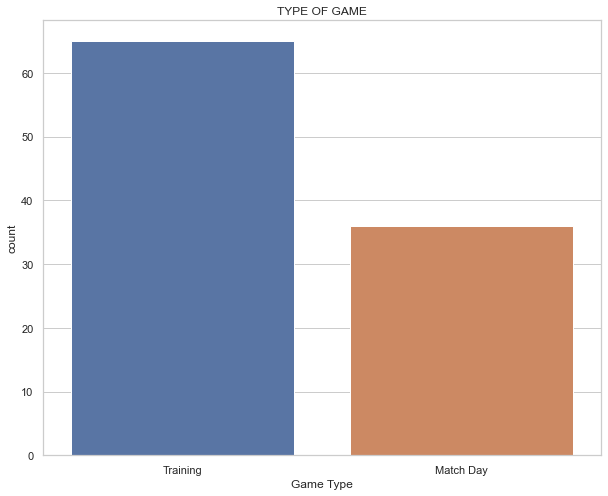

In [52]:
print(footy['Game Type'].value_counts())
sns.countplot(footy['Game Type']).set_title('TYPE OF GAME')

plt.show()

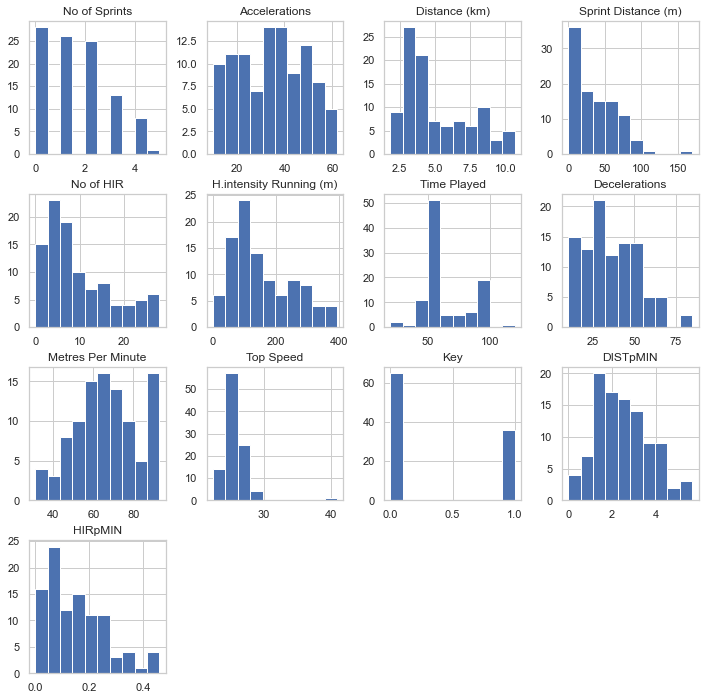

In [53]:
footy.hist(figsize=(12,12))
plt.show()

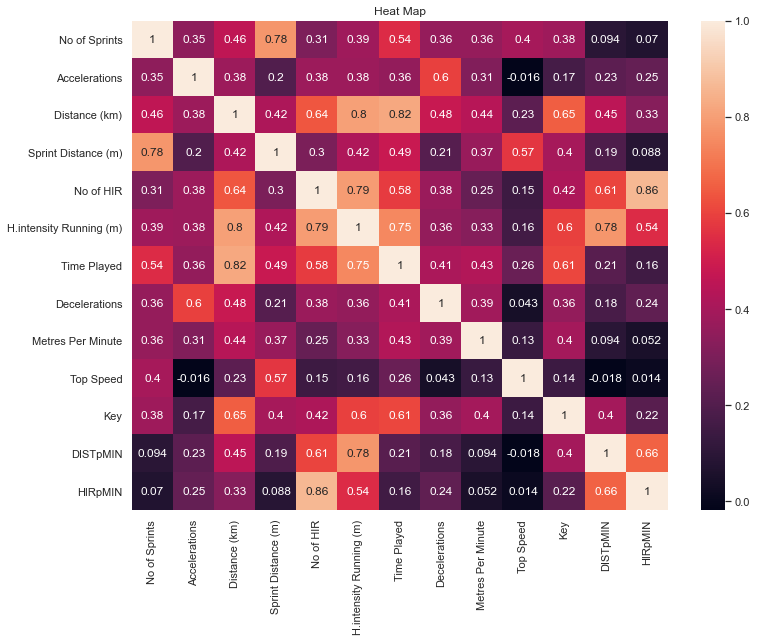

In [54]:
#Correlation Plot
plt.figure(figsize=(12,9))
footy = sns.heatmap(footy.corr(), annot = True)
footy.set(title = "Heat Map")
plt.show()

In [55]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'player position' column
Footy['Player position'] = lab.fit_transform(Footy['Player position'])

#view updated DataFrame
print(Footy)

     No of Sprints  Accelerations  Player position  Sprint Distance (m)  \
0                1             47                1                   34   
1                4             58                1                   67   
2                0             14                1                    0   
3                1             15                1                   87   
4                2             25                1                   32   
..             ...            ...              ...                  ...   
96               2             20                0                   72   
97               4             52                0                   87   
98               0             14                0                    9   
99               2             31                0                   18   
100              2             37                0                   23   

     H.intensity Running (m)  Time Played  Decelerations  Metres Per Minute  \
0                   

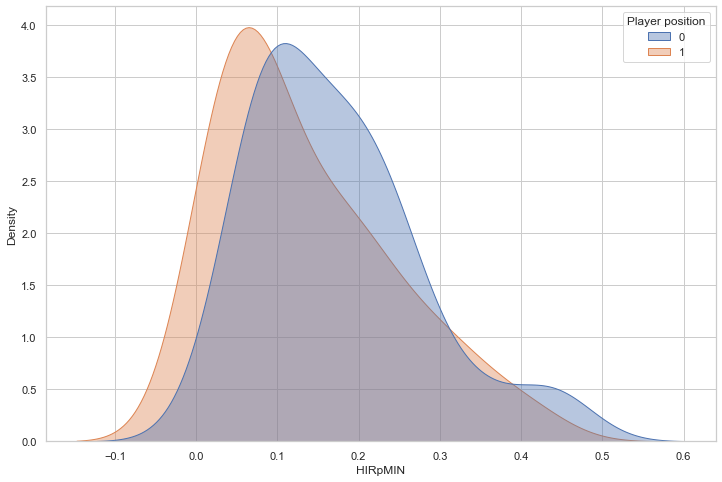

In [56]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# Without transparency
#sns.kdeplot(data=Footy, x="DISTpMIN", hue="Key", cut=0, fill=True, common_norm=False, alpha=1)
#plt.show()
# With transparency
sns.kdeplot(data=Footy, x="HIRpMIN", hue="Player position", fill=True, common_norm=False, alpha=0.4)
plt.show()

**0 = Winger, 1 = Midfielder**

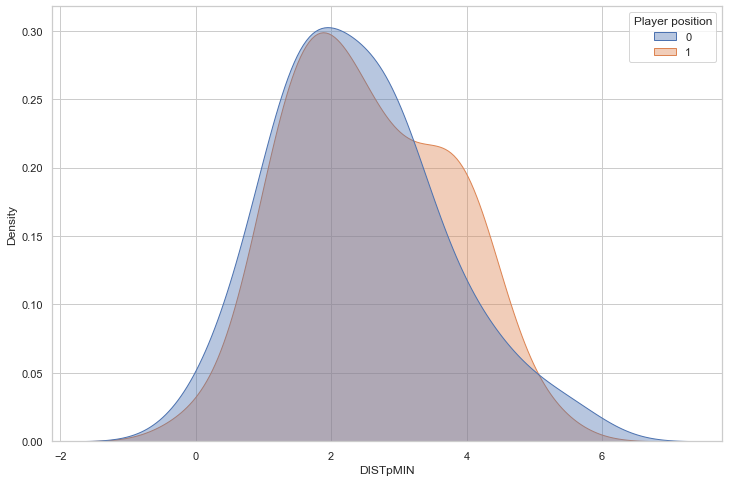

In [57]:
# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# Without transparency
#sns.kdeplot(data=Footy, x="DISTpMIN", hue="Key", cut=0, fill=True, common_norm=False, alpha=1)
#plt.show()
# With transparency
sns.kdeplot(data=Footy, x="DISTpMIN", hue="Player position", fill=True, common_norm=False, alpha=0.4)
plt.show()

**0 = Winger, 1 = Midfielder**

In [58]:
Footy.dtypes

No of Sprints                int64
Accelerations                int64
Player position              int32
Sprint Distance (m)          int64
H.intensity Running (m)      int64
Time Played                  int64
Decelerations                int64
Metres Per Minute            int64
Top Speed                  float64
Distance (km)              float64
Key                          int64
No of HIR                    int64
HIRpMIN                    float64
DISTpMIN                   float64
dtype: object

In [59]:
x= Footy.drop(['Key'], axis=1)
y=Footy['Key']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [61]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [62]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.456738,1.083790,-1.028992,-0.616745,-0.855307,-0.722488,0.609833,1.003158,-0.733210,-0.850412,-0.660120,-0.503449,-0.816218
1,0.304492,1.011675,-1.028992,1.075095,1.628531,1.445749,2.938285,1.677712,0.577326,2.057287,1.343496,0.711572,1.093377
2,1.065721,1.011675,-1.028992,0.652135,0.481377,1.445749,1.923319,1.610256,0.563385,1.702898,0.466914,0.002810,-0.058792
3,-0.456738,0.002060,0.971825,0.954249,1.349224,0.361631,-0.763357,0.935703,1.539316,1.079515,2.094852,2.100168,1.654433
4,-0.456738,-0.214285,-1.028992,0.017695,0.112293,-0.993517,-0.823061,-0.278494,0.015004,0.050505,-0.910572,-0.807204,1.273716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,-0.456738,-0.863323,-1.028992,-0.798013,-1.194465,-0.993517,-0.285726,-0.413405,0.126539,-1.127946,-0.785346,-0.604700,-1.351225
66,1.826951,0.506868,-1.028992,0.954249,0.341724,0.903690,1.923319,1.745167,0.433260,1.006929,-0.409668,-0.617357,0.042649
67,0.304492,-1.151784,0.971825,-0.133362,0.451451,1.174720,-1.300692,-0.345950,1.032761,1.339969,-0.534894,-0.771468,0.031378
68,0.304492,1.300136,-1.028992,-0.526110,2.037517,1.445749,1.206872,-0.413405,-0.226655,1.497950,1.719174,1.015328,1.504150


In [63]:
#RANDOM FOREST

rf = RandomForestRegressor()
rfmodel = rf.fit(x_train, y_train)
rfscore = rf.score(x_test, y_test)*100
rf_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, rf.predict(x_test))

print("The mean squared error (MSE): {:.4f}".format(mse))
print("Accuracy of DT model is: %.2f"%rfscore)

The mean squared error (MSE): 0.1530
Accuracy of DT model is: 33.18


In [64]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter search space
param_grid = {
    'n_estimators': [5, 20, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define evaluation metric
scoring = 'neg_mean_squared_error'

# Define RF model
model = RandomForestRegressor(random_state=30)

# Define GridSearchCV object
grid_search = GridSearchCV(
    model, param_grid, scoring=scoring, cv=5, n_jobs=-1)

# Fit GridSearchCV object
grid_search.fit(x_train, y_train)

# Print best hyperparameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use best hyperparameters to fit final model
best_model = grid_search.best_estimator_
best_model.fit(x, y)

# Evaluate final model on test data
y_pred = best_model.predict(x)
test_score = mean_squared_error(y, y_pred)
print("Final model test score:", test_score)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score: -0.05802718710154969
Final model test score: 0.041189323453475


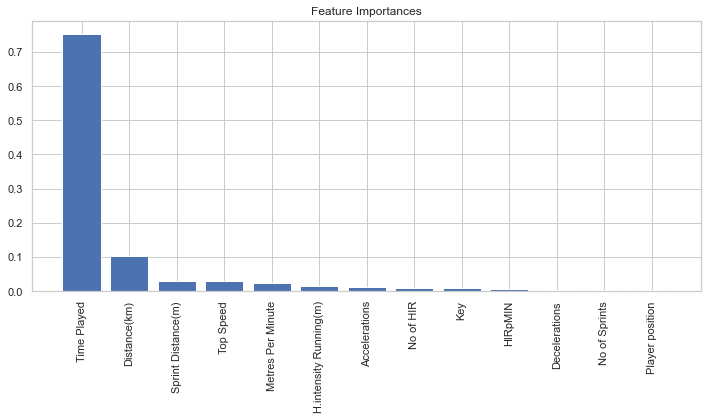

In [65]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# create a random forest regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model on the training data
rf.fit(x_train, y_train)

# get feature importances
importances = rf.feature_importances_

# get feature names
feature_names = np.array(['No of Sprints','Accelerations','Player position','Sprint Distance(m)','H.intensity Running(m)','Time Played','Decelerations','Metres Per Minute','Top Speed','Distance(km)','Key','No of HIR', 'HIRpMIN', 'DISTpMIN'])

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [66]:
#DECISION TREE

dt = DecisionTreeRegressor()
dtmodel = dt.fit(x_train, y_train)
dtscore = dt.score(x_test, y_test)*100
dt_pred = dt.predict(x_test)
mse = mean_squared_error(y_test, dt.predict(x_test))


print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print("The mean squared error (MSE): {:.4f}".format(mse))
print("Accuracy of DT model is: %.3f"%dtscore)

[[16  4]
 [ 2  9]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.69      0.82      0.75        11

    accuracy                           0.81        31
   macro avg       0.79      0.81      0.80        31
weighted avg       0.82      0.81      0.81        31

The mean squared error (MSE): 0.1935
Accuracy of DT model is: 15.455


In [67]:
#RIDGE REGRESSION MODEL

ridgeReg = Ridge(alpha=10)

ridgeReg.fit(x_train,y_train)
ridgescore = ridgeReg.score(x_test, y_test)*100
ridgeReg = ridgeReg.predict(x_test)

print("Accuracy of LG model is: %.3f"%ridgescore)

Accuracy of LG model is: -14.978


In [68]:
#SUPPORT VECTOR REGRESSION

svr = SVR()
svr = svr.fit(x_train, y_train)
svrscore = svr.score(x_test, y_test)*100
y_pred = svr.predict(x_test)
mse = mean_squared_error(y_test, svr.predict(x_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Accuracy of LG model is: %.2f"%svrscore)

The mean squared error (MSE) on test set: 0.1432
Accuracy of LG model is: 37.43


In [69]:
#GRADIENT BOOSTING

gb = GradientBoostingRegressor()
gb = gb.fit(x_train, y_train)
gbscore = gb.score(x_test, y_test)*100
y_pred = gb.predict(x_test)
mse = mean_squared_error(y_test, gb.predict(x_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("Accuracy of LG model is: %.2f"%gbscore)

The mean squared error (MSE) on test set: 0.1590
Accuracy of LG model is: 30.54


In [70]:
# Initialize Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
las = lasso.fit(x_train, y_train)

las_score = las.score(x_test, y_test)*100
# Make predictions on the testing data
y_pred = lasso.predict(x_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("Accuracy of Lasso model is: %.2f"%las_score)

Mean Squared Error:  0.225643719774895
Accuracy of Lasso model is: 1.43


# DEEP LEARNING (ANN)

In [71]:
import warnings  

# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[x_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'accuracy'])

# Train the model
ann = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Evaluate the model
test_loss, test_mae, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test MSE: ', test_mae)
print('Test Accuracy: {:.2f}%'.format(test_accuracy*100))


# Make predictions
y_pred = model.predict(x_test)

Test MSE:  0.19232214987277985
Test Accuracy: 80.65%


# MODEL COMPARISON

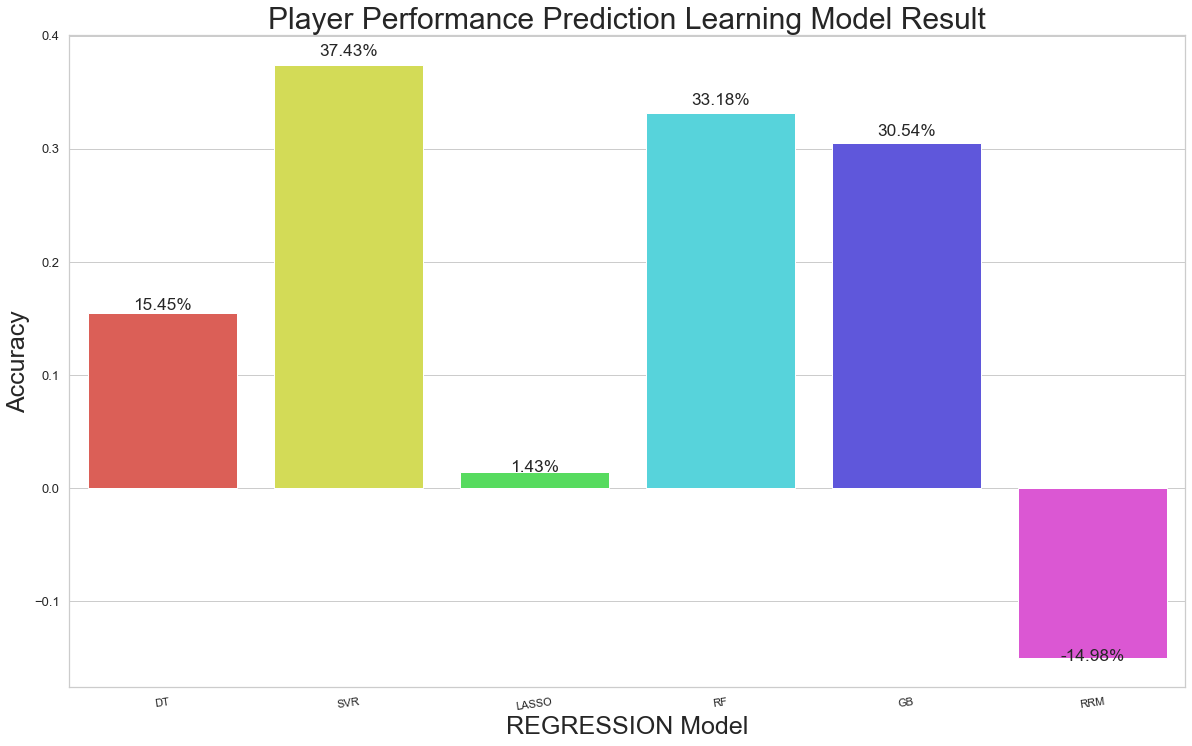

In [72]:
viz =[]
viz2 = []
viz.append(dtscore/100)
viz2.append('DT')
viz.append(svrscore/100)
viz2.append('SVR')
viz.append(las_score/100)
viz2.append('LASSO')
viz.append(rfscore/100)
viz2.append('RF')
viz.append(gbscore/100)
viz2.append('GB')
viz.append(ridgescore/100)
viz2.append('RRM')
plt.rcParams['figure.figsize'] = 10,8
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
ax = sns.barplot(x=viz2, y=viz, palette= 'hls', saturation=1.5)
plt.xlabel('REGRESSION Model', fontsize=25)
plt.ylabel('Accuracy', fontsize=25)
plt.title('Player Performance Prediction Learning Model Result',fontsize=30 )
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()